<a href="https://colab.research.google.com/github/LuciaHrovatin/Credit_Analytics/blob/main/CreditAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# Credit Analytics
## Project 1
### CAS Introduction to Machine Learning in Finance and Insurance (Spring 2025)
#### Navarro Diego - <href>dnavarro@ethz.ch</href>
#### Rizzi Michele - <href>mirizzi@ethz.ch</href>
#### Hrovatin Lucia - <href>lhrovatin@ethz.ch</href>

</center>

In [71]:
# Import all the Python libraries we are going to use

# Data Transformation
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical learning
from scipy.stats import bernoulli
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # logistic regression model
from sklearn.metrics import log_loss # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import roc_curve # evaluation metric
from sklearn.metrics import roc_auc_score # evaluation metric
from sklearn.metrics import classification_report # evaluation metric
from sklearn import metrics # evaluation metric

# Deep Learning
try:
    import keras
except ImportError:
    !pip install keras --quiet
    import keras

try:
    import keras_tuner
except ImportError:
    !pip install keras-tuner --quiet
    import keras_tuner


In [ ]:
### Fix random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)

# Exercise 1. Dataset features generation.

In [ ]:
# Number of samples
m = 20000  # training set
n = 10000  # test set

# Total number of samples
total_samples = m + n

# Generate xi1: age from the uniform distribution on [18, 80]
x1 = np.random.uniform(18, 80, total_samples)

# Generate xi2: monthly income (in CHF 1000) from the uniform distribution on [1, 15]
x2 = np.random.uniform(1, 15, total_samples)

# Generate xi3: salaried/self-employed in {0, 1}, where 0=salaried and 1=self-employed (probability of being self-employed is 10%)
x3 = np.random.choice([0, 1], total_samples, p=[0.9, 0.1])

# Combine the features into a single dataset
features = np.column_stack((x1, x2, x3))

# Combine the features in a DataFrame
features_df = pd.DataFrame(np.column_stack((x1, x2, x3)), columns=['Age', 'Income', 'Employment_type'])

# Print summary statistics
print("Dataset Summary Statistics:")
print(features_df.describe().round(2))

# Split the dataset into training and test sets
#training_set = features[:m]
#test_set = features[m:]

# Display the first few rows of the training set
#print("Training set (first 5 samples):")
#print(training_set[:5])

# Display the first few rows of the test set
#print("Test set (first 5 samples):")
#print(test_set[:5])

Dataset Summary Statistics:
            Age    Income  Employment_type
count  30000.00  30000.00          30000.0
mean      48.97      7.99              0.1
std       17.85      4.04              0.3
min       18.00      1.00              0.0
25%       33.58      4.49              0.0
50%       49.02      8.00              0.0
75%       64.36     11.51              0.0
max       80.00     15.00              1.0


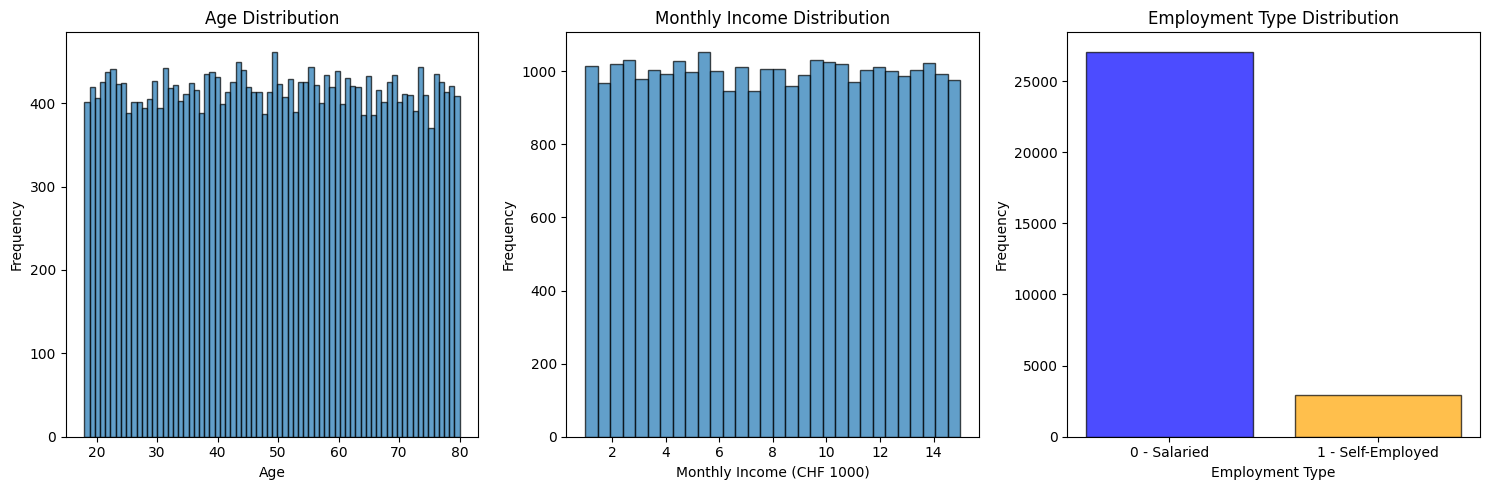

In [ ]:
# Plot histograms for each feature in the dataset
plt.figure(figsize=(15, 5))

# Histogram for xi1: age
plt.subplot(1, 3, 1)
plt.hist(x1, bins=72, edgecolor='k', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for xi2: monthly income
plt.subplot(1, 3, 2)
plt.hist(x2, bins=30, edgecolor='k', alpha=0.7)
plt.title('Monthly Income Distribution')
plt.xlabel('Monthly Income (CHF 1000)')
plt.ylabel('Frequency')

# Histogram for xi3: salaried/self-employed
plt.subplot(1, 3, 3)
employment_counts = features_df['Employment_type'].value_counts()

# Create the bar chart
plt.bar(employment_counts.index, employment_counts.values,
        color=['blue', 'orange'], edgecolor='k', alpha=0.7)
plt.xticks(employment_counts.index, ['0 - Salaried', '1 - Self-Employed'])

#plt.hist(x3, bins=2, edgecolor='k', alpha=0.7)
plt.title('Employment Type Distribution')
plt.xlabel('Employment Type')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Exercise 2. Dataset labels generation.

In [ ]:
# Definition of logistic function
def logistic(z):
    return 1 / (1 + np.exp(-z))

# Define the functions p1 and p2
def p1(X):
    return logistic(-13.3 + 0.33 * X[:, 0] - 3.5 * X[:, 1] + 3 * X[:, 2])

def p2(X):
    def suppport_fnc(x):
        return 10 * ((x < 25) + (x > 75)) + 0
    return logistic(-5 + suppport_fnc(X[:, 0]) - 1.1 * X[:, 1] + X[:, 2])


prob_y1 = p1(features)
prob_y2 = p2(features)
y1 = bernoulli.rvs(prob_y1)
y2 = bernoulli.rvs(prob_y2)

# Create dataframes for the labels
df1 = pd.DataFrame({'Age': x1, 'Income': x2, 'Self-employed': x3, 'Default': y1})
df2 = pd.DataFrame({'Age': x1, 'Income': x2, 'Self-employed': x3, 'Default': y2})

In [ ]:
# Divide the dataset into training and test sets
training_set_x, test_set_x, training_set_y1, test_set_y1, training_set_y2, test_set_y2 = train_test_split(
    features, y1, y2, train_size=m, test_size=n, random_state=random_seed)

# Features normalization
#scaler = preprocessing.StandardScaler()
##training_set_x = scaler.fit_transform(training_set_x)
#test_set_x = scaler.transform(test_set_x)

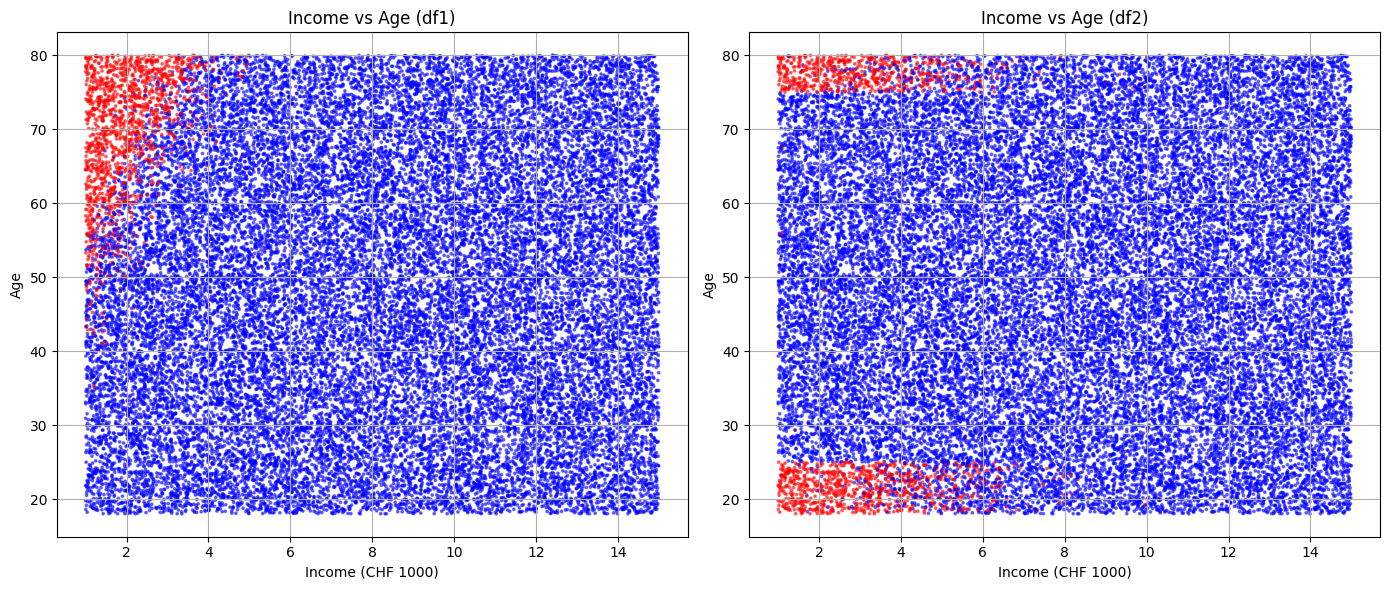

In [ ]:
plt.figure(figsize=(14, 6))

# Scatter plot for df1
plt.subplot(1, 2, 1)
colors = {0: 'blue', 1: 'red'}
plt.scatter(df1['Income'], df1['Age'], c=df1['Default'].apply(lambda x: colors[x]), alpha=0.5, s=3)
plt.title('Income vs Age (df1)')
plt.xlabel('Income (CHF 1000)')
plt.ylabel('Age')
plt.grid(True)

# Scatter plot for df2
plt.subplot(1, 2, 2)
plt.scatter(df2['Income'], df2['Age'], c=df2['Default'].apply(lambda x: colors[x]), alpha=0.5, s=3)
plt.title('Income vs Age (df2)')
plt.xlabel('Income (CHF 1000)')
plt.ylabel('Age')
plt.grid(True)

plt.tight_layout()
plt.show()

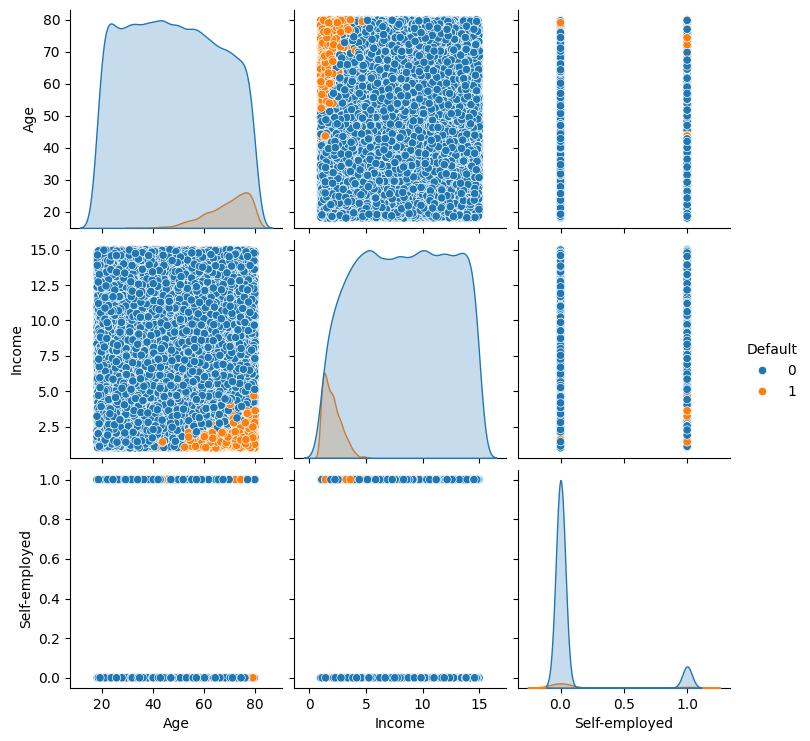

In [ ]:
sns.pairplot(df1, hue='Default')
plt.show()

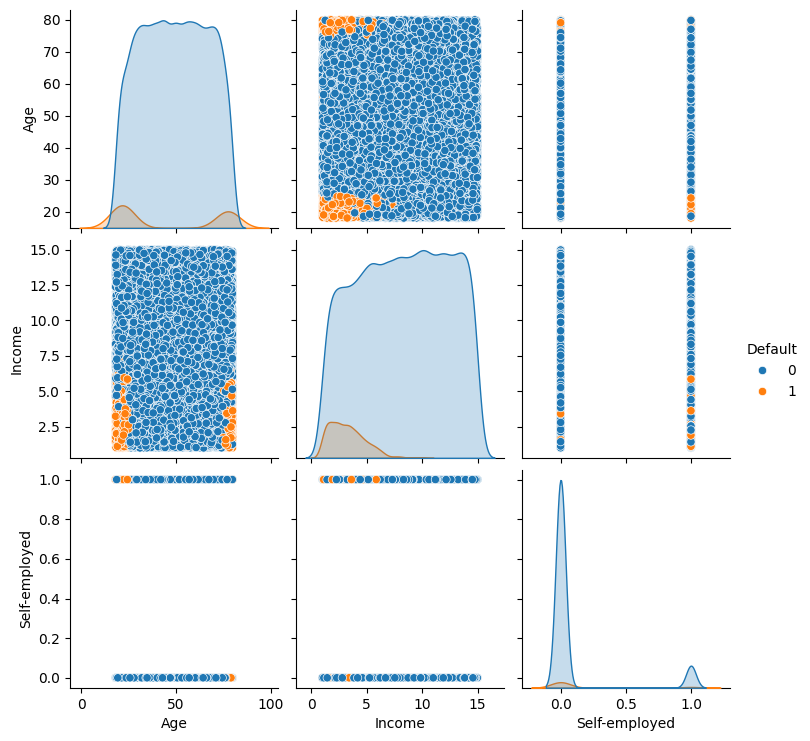

In [ ]:
# Create a pairplot for df2
sns.pairplot(df2, hue='Default')
plt.show()

# Exercise 3. Model implementations.

### 3a) Logistic regression (LR)

In [ ]:
# Implement and train a logistic regression model
logistic_regression_linear = LogisticRegression(penalty=None, random_state=random_seed).fit(training_set_x, training_set_y1)
logistic_regression_nonlinear = LogisticRegression(penalty=None, random_state=random_seed).fit(training_set_x, training_set_y2)

# Look at the parameters of the fitted model
print('Coefficients1:', logistic_regression_linear.coef_)
print('Intercept1:', logistic_regression_linear.intercept_)
print('Coefficients2:', logistic_regression_nonlinear.coef_)
print('Intercept2:', logistic_regression_nonlinear.intercept_)
# Predict the labels for the test set
predicted_y1 = logistic_regression_linear.predict(test_set_x)
predicted_y2 = logistic_regression_nonlinear.predict(test_set_x)

Coefficients1: [[ 0.322021   -3.45358836  3.05838195]]
Intercept1: [-12.9646766]
Coefficients2: [[-0.01853275 -0.48244384  0.20099356]]
Intercept2: [0.45082921]


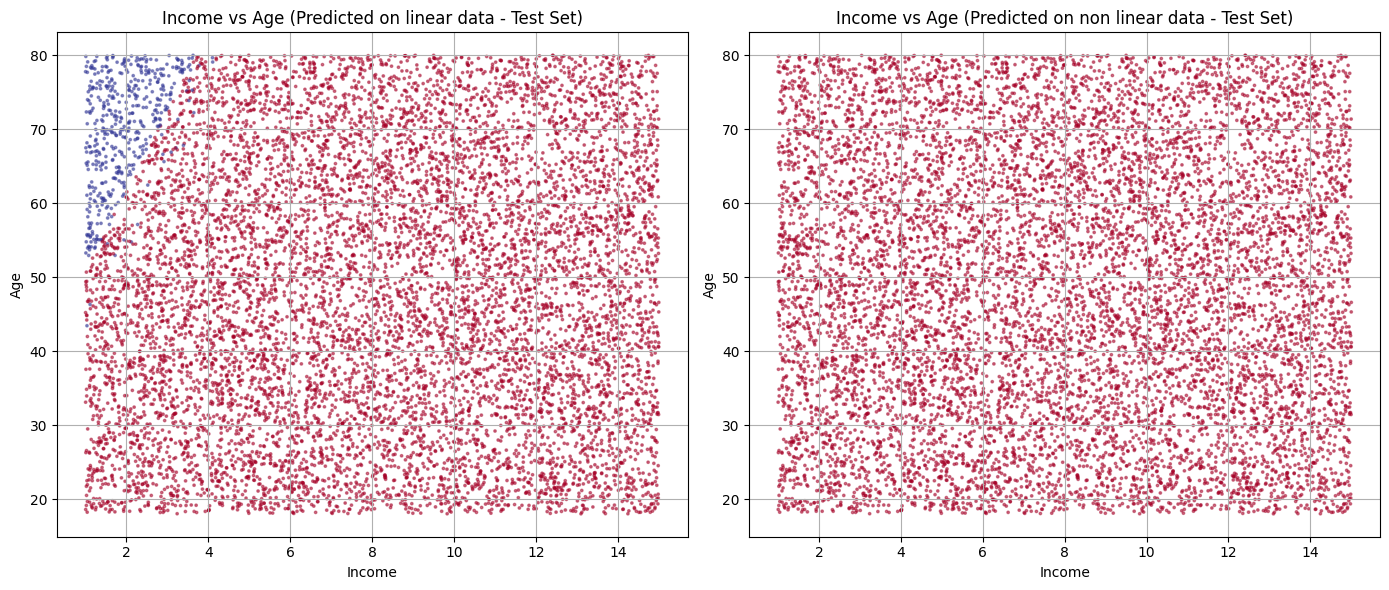

In [ ]:
plt.figure(figsize=(14, 6))

# Scatter plot for predicted_y1
plt.subplot(1, 2, 1)
plt.scatter(test_set_x[:, 1], test_set_x[:, 0], c=predicted_y1, cmap=plt.cm.RdYlBu, alpha=0.5, s=3)
plt.title('Income vs Age (Predicted on linear data - Test Set)')
plt.xlabel('Income')
plt.ylabel('Age')
plt.grid(True)

# Scatter plot for predicted_y2( really bad!)
plt.subplot(1, 2, 2)
plt.scatter(test_set_x[:, 1], test_set_x[:, 0], c=predicted_y2, cmap=plt.cm.RdYlBu, alpha=0.5, s=3)
plt.title('Income vs Age (Predicted on non linear data - Test Set)')
plt.xlabel('Income')
plt.ylabel('Age')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Compute cross-entropy loss for the training set
train_loss_y1 = log_loss(training_set_y1, logistic_regression_linear.predict_proba(training_set_x))
train_loss_y2 = log_loss(training_set_y2, logistic_regression_nonlinear.predict_proba(training_set_x))

# Compute cross-entropy loss for the test set
test_loss_y1 = log_loss(test_set_y1, logistic_regression_linear.predict_proba(test_set_x))
test_loss_y2 = log_loss(test_set_y2, logistic_regression_nonlinear.predict_proba(test_set_x))

print(f'Training Loss for y1: {train_loss_y1:.3f}')
print(f'Training Loss for y2: {train_loss_y2:.3f}')
print(f'Test Loss for y1: {test_loss_y1:.3f}')
print(f'Test Loss for y2: {test_loss_y2:.3f}')

Training Loss for y1: 0.034
Training Loss for y2: 0.155
Test Loss for y1: 0.032
Test Loss for y2: 0.157


Text(0.5, 36.72222222222221, 'Predicted label')

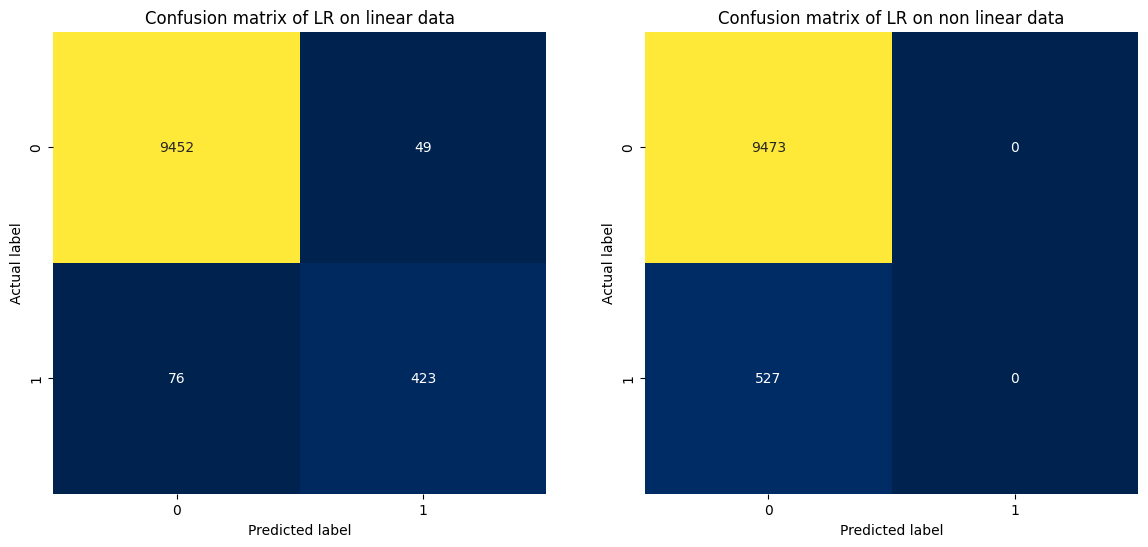

In [ ]:
# Confusion Matrix of the models
plt.figure(figsize=(14, 6))
class_names=[0,1] # prediction names
tick_marks = np.arange(len(class_names))

# Confusion Matrix Linear
plt.subplot(1, 2, 1)
cnf_matrix = metrics.confusion_matrix(test_set_y1, predicted_y1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="cividis" ,fmt='g', cbar=False)
plt.title('Confusion matrix of LR on linear data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Confusion Matrix nonLinear
plt.subplot(1, 2, 2)
cnf_matrix = metrics.confusion_matrix(test_set_y2, predicted_y2)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="cividis" ,fmt='g', cbar=False)
plt.title('Confusion matrix of LR on non linear data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
target_names = ['no_loan', 'loan']
print(classification_report(test_set_y1, predicted_y1, target_names=target_names))

print(classification_report(test_set_y2, predicted_y2, target_names=target_names, zero_division=True))

              precision    recall  f1-score   support

     no_loan       0.99      0.99      0.99      9501
        loan       0.90      0.85      0.87       499

    accuracy                           0.99     10000
   macro avg       0.94      0.92      0.93     10000
weighted avg       0.99      0.99      0.99     10000

              precision    recall  f1-score   support

     no_loan       0.95      1.00      0.97      9473
        loan       1.00      0.00      0.00       527

    accuracy                           0.95     10000
   macro avg       0.97      0.50      0.49     10000
weighted avg       0.95      0.95      0.92     10000



### 3b) Neural network (NN)

In [ ]:
# Implement and train a neural network model
# Starting Parameters
lr = 0.001 # learning rate
batch_size = 1024
epochs = 100

def NeuralNetwork(units, lr, hl_number):
  """
  This function creates a neural network, depending on the given parameters:
  - units: number of neurons in the hidden layers
  - lr: learning rate
  - hl_number: number of hidden layers
  """

  model = keras.Sequential()
  model.add(keras.Input(shape=(3,)))

  for i in range(hl_number):
    model.add(keras.layers.Dense(units,
                               activation='relu',
                               kernel_initializer='glorot_uniform', # Weight initialization
                               bias_initializer='zeros'))  # Features initialization)
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                loss=keras.losses.BinaryCrossentropy())
  return model

neural_network_linear = NeuralNetwork(20, lr, 2)
neural_network_nonlinear = NeuralNetwork(50, lr, 3)

neural_network_linear.summary()

# Two hidden layers with 20 neurons each with ReLU activativation function
# Output layer with sigmoid activation function (needed to output probabilities!)
#neural_network1 = keras.Sequential([keras.layers.Dense(20, activation='relu', input_shape=(training_set_x.shape[1])),
#                                   keras.layers.Dense(20, activation='relu'),
#                                   keras.layers.Dense(1, activation='sigmoid')])

# Compile the network
# We choose Adam as gradient descent algorithm and cross-entropy as loss function
#neural_network1.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
#                       loss=keras.losses.BinaryCrossentropy())

#neural_network2 = keras.Sequential([keras.layers.Dense(50, activation='relu'),
#                                   keras.layers.Dense(50, activation='relu'),
#                                  keras.layers.Dense(50, activation='relu'),
#                                  keras.layers.Dense(1, activation='sigmoid')])

#neural_network2.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
#                       loss=keras.losses.BinaryCrossentropy())
neural_network_nonlinear.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 521 (2.04 KB)

 Trainable params: 521 (2.04 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 50)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,351 (20.90 KB)

 Trainable params: 5,351 (20.90 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history1_linear = neural_network_linear.fit(x=training_set_x, y=training_set_y1, batch_size=batch_size, epochs=epochs)

history2_nonlinear = neural_network_nonlinear.fit(x=training_set_x, y=training_set_y2, batch_size=batch_size, epochs=epochs)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5286
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1349  
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1130 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0976 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0930 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0912 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0764 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0732 
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0682 
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0668 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0655 
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0649
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0630 
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0614 
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss

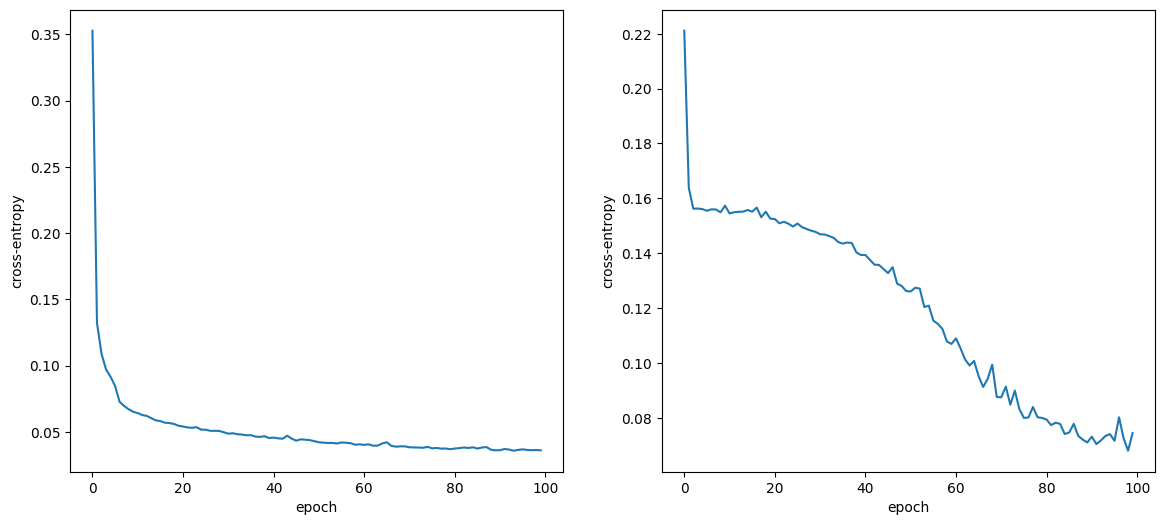

In [ ]:
# Training Performance
plt.figure(figsize=(14, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history1_linear.history['loss'])
plt.ylabel('cross-entropy')
plt.xlabel('epoch')


# Loss
plt.subplot(1, 2, 2)
plt.plot(history2_nonlinear.history['loss'])
plt.ylabel('cross-entropy')
plt.xlabel('epoch')

plt.show()

In [ ]:
# Compute cross-entropy loss for the training set
train_loss_nn1_linear = neural_network_linear.evaluate(training_set_x, training_set_y1, verbose=1)
train_loss_nn2_nonlinear = neural_network_nonlinear.evaluate(training_set_x, training_set_y2, verbose=1)

# Compute cross-entropy loss for the test set
test_loss_nn1_linear = neural_network_linear.evaluate(test_set_x, test_set_y1, verbose=1)
test_loss_nn2_nonlinear = neural_network_nonlinear.evaluate(test_set_x, test_set_y2, verbose=1)

predicted_nn_y1 = neural_network_linear.predict(test_set_x)
predicted_nn_y2 = neural_network_nonlinear.predict(test_set_x)

print(f"Training Loss for neural network 1 linear: {train_loss_nn1_linear:.3f}")
print(f"Test Loss for neural network 1 linear: {test_loss_nn1_linear:.3f}")

print(f"Training Loss for neural network 2 non linear: {train_loss_nn2_nonlinear:.3f}")
print(f"Test Loss for neural network 2 non linear: {test_loss_nn2_nonlinear:.3f}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0367
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0735
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0316
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0807
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Training Loss for neural network 1 linear: 0.035
Test Loss for neural network 1 linear: 0.034
Training Loss for neural network 2 non linear: 0.073
Test Loss for neural network 2 non linear: 0.076


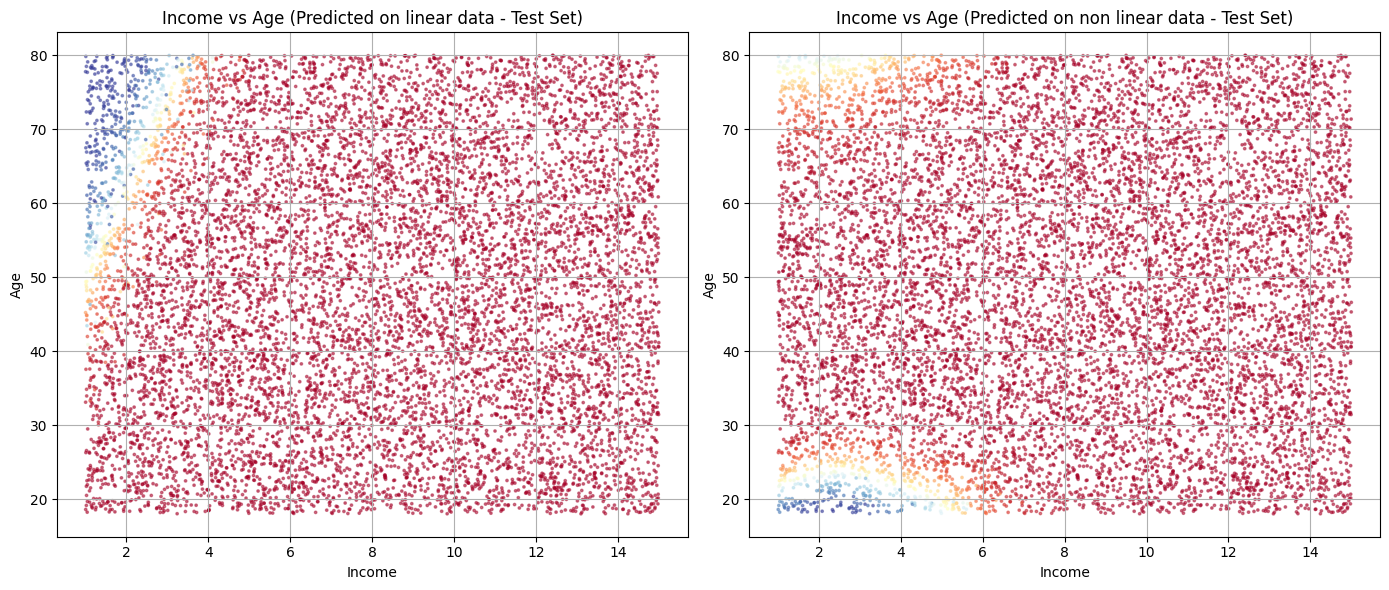

In [ ]:
plt.figure(figsize=(14, 6))

# Scatter plot for predicted_y1
plt.subplot(1, 2, 1)
plt.scatter(test_set_x[:, 1], test_set_x[:, 0], c=predicted_nn_y1, cmap=plt.cm.RdYlBu, alpha=0.5, s=3)
plt.title('Income vs Age (Predicted on linear data - Test Set)')
plt.xlabel('Income')
plt.ylabel('Age')
plt.grid(True)

# Scatter plot for predicted_y2( really bad!)
plt.subplot(1, 2, 2)
plt.scatter(test_set_x[:, 1], test_set_x[:, 0], c=predicted_nn_y2, cmap=plt.cm.RdYlBu, alpha=0.5, s=3)
plt.title('Income vs Age (Predicted on non linear data - Test Set)')
plt.xlabel('Income')
plt.ylabel('Age')
plt.grid(True)

plt.tight_layout()
plt.show()

Tuner

In [ ]:
import tensorflow as tf
import keras_tuner as kt

def build_model(hp):
    model = keras.Sequential()

    # Tune the number of layers
    for i in range(hp.Int('num_layers', 1, 3)): #number of layers
        model.add(keras.layers.Dense(
            units=hp.Int('units_' + str(i), #number of neurons
                         min_value=16,
                         max_value=128,
                         step=16),
            activation=hp.Choice('activation_' + str(i), ['relu', 'leaky_relu']) #activation function
        ))

    model.add(keras.layers.Dense(1, activation='sigmoid')) # output layer

    # Tune the learning rate
    lr = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])

    optimizer_choice = hp.Choice('optimizer', ['adam', 'sgd'])

    model.compile(optimizer=optimizer_choice,
                  loss='binary_crossentropy',
                  metrics=['recall'])

    return model

def tuner_build_model(training_set_x, training_set_y, path, name, e):
  tuner = kt.RandomSearch(
        build_model,
        objective='val_recall',
        max_trials=10,
        executions_per_trial=1,
        directory=path,
        project_name=name
      )
  stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
  tuner.search(training_set_x, training_set_y, epochs=e, validation_split=0.2, callbacks=[stop_early])

  return tuner

# Get the optimal hyperparameters
#tuner_linear = tuner_build_model(training_set_x, training_set_y1, 'tuner', 'tuner_y1', e=epochs)
tuner_nonlinear = tuner_build_model(training_set_x, training_set_y2, 'tuner', 'tuner_y2', e=epochs)


#print(f"""
#The optimal number of layers is {best_hps.get('num_layers')}.
#The optimal number of units in each layer is {[best_hps.get('units_' + str(i)) for i in range(best_hps.get('num_layers'))]}.
#The optimal activation functions are {[best_hps.get('activation_' + str(i)) for i in range(best_hps.get('num_layers'))]}.
#The optimal learning rate is {best_hps.get('learning_rate')}.
#""")

Reloading Tuner from tuner/tuner_y2/tuner0.json


In [ ]:
# Build the improved model using the optimal hyperparameters for y2
#best_NN_linear = tuner_linear.hypermodel.build(tuner_linear.get_best_hyperparameters(num_trials = 1)[0])
#history_linear = best_NN_linear.fit(x=training_set_x, y=training_set_y1, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.3295 - recall: 0.0000e+00
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1062 - recall: 0.0900
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0474 - recall: 0.8082
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0468 - recall: 0.8179
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0377 - recall: 0.8590
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0450 - recall: 0.8308
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0409 - recall: 0.8241
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0430 - recall: 0.8491
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - recall: 0.8178
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0408 - recall: 0.8454
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0351 - recall: 0.8472
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0421 - recall: 0.85

In [ ]:
best_NN_nonlinear = tuner_nonlinear.hypermodel.build(tuner_nonlinear.get_best_hyperparameters(num_trials = 1)[0])
history_nonlinear = best_NN_nonlinear.fit(x=training_set_x, y=training_set_y2, batch_size=batch_size, epochs=200, validation_split=0.2)



Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.2907 - recall: 0.0000e+00 - val_loss: 0.2335 - val_recall: 0.0000e+00
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1999 - recall: 0.0000e+00 - val_loss: 0.1731 - val_recall: 0.0000e+00
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1682 - recall: 0.0000e+00 - val_loss: 0.1633 - val_recall: 0.0000e+00
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1635 - recall: 0.0000e+00 - val_loss: 0.1594 - val_recall: 0.0000e+00
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1644 - recall: 0.0000e+00 - val_loss: 0.1567 - val_recall: 0.0000e+00
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1583 - recall: 0.0000e+00 - val_loss: 0.1546 - val_recall: 0.0000e+00
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1666 - recall: 0.0000e+00 - val_loss: 0.1550 - val_recall: 0.0000e+00
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1524 - recall:

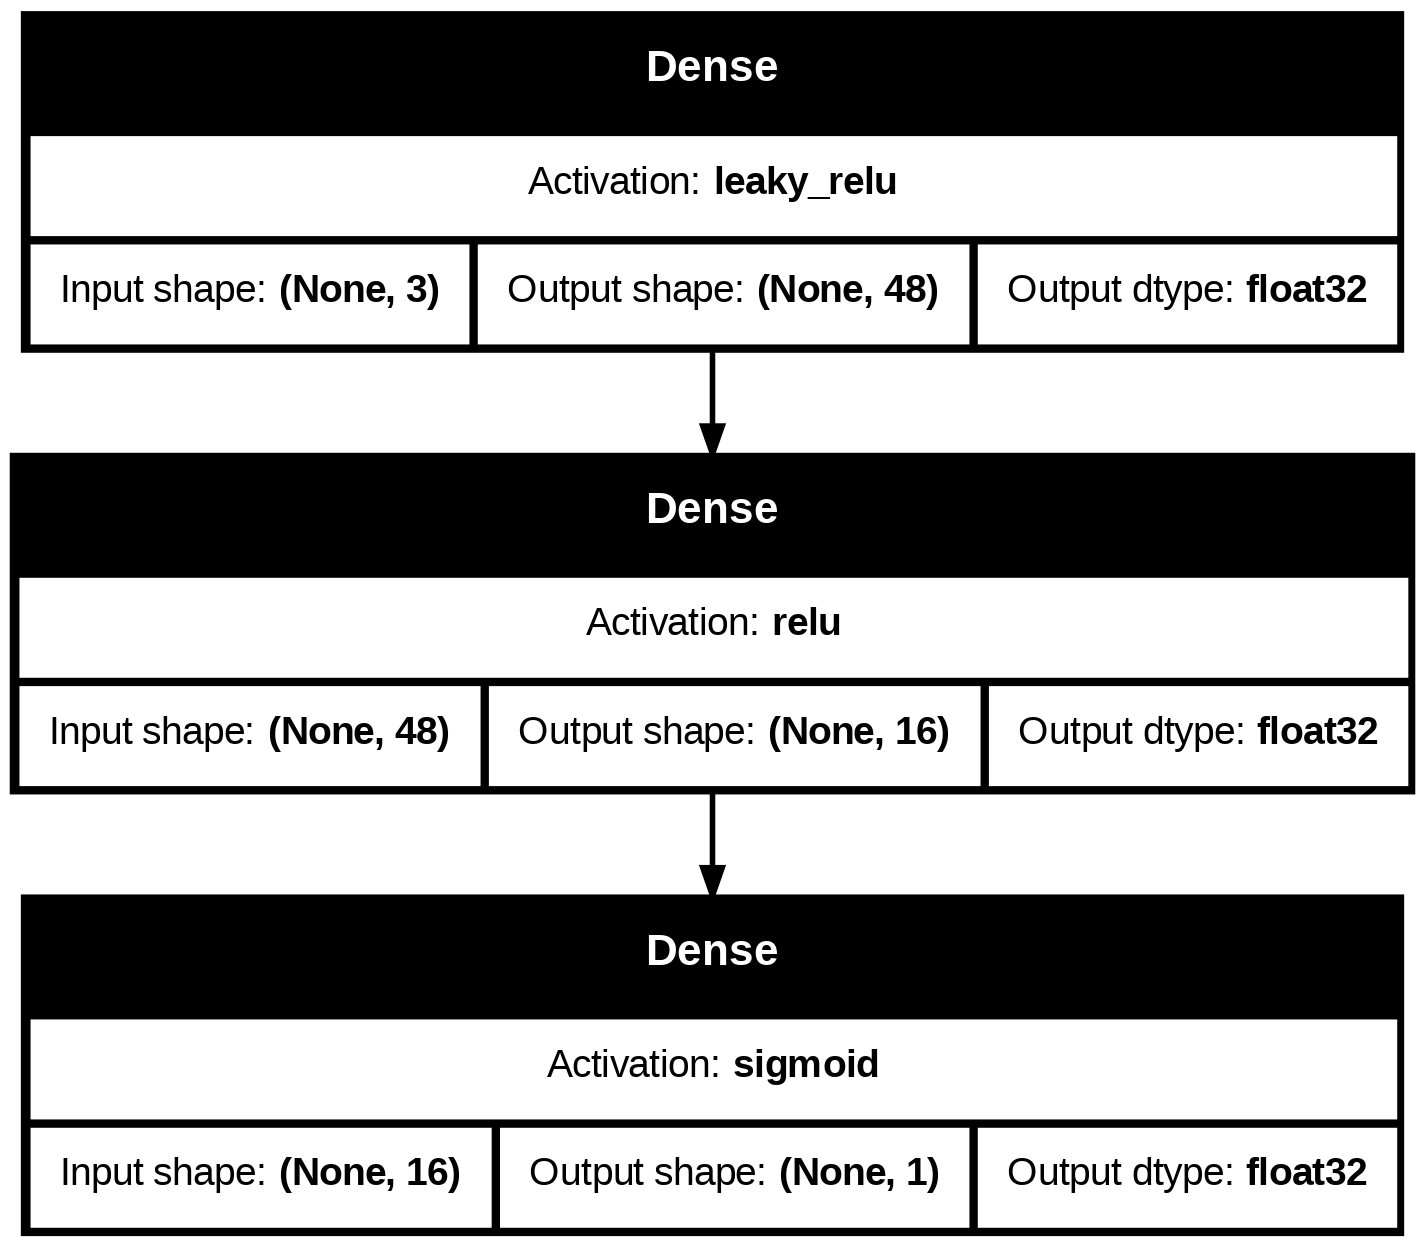

In [ ]:
from tensorflow.keras.utils import plot_model

# Generate both a plot and a text description
plot_model(best_NN_nonlinear, show_shapes=True,
          show_dtype=True, expand_nested=True,
          show_layer_activations=True)

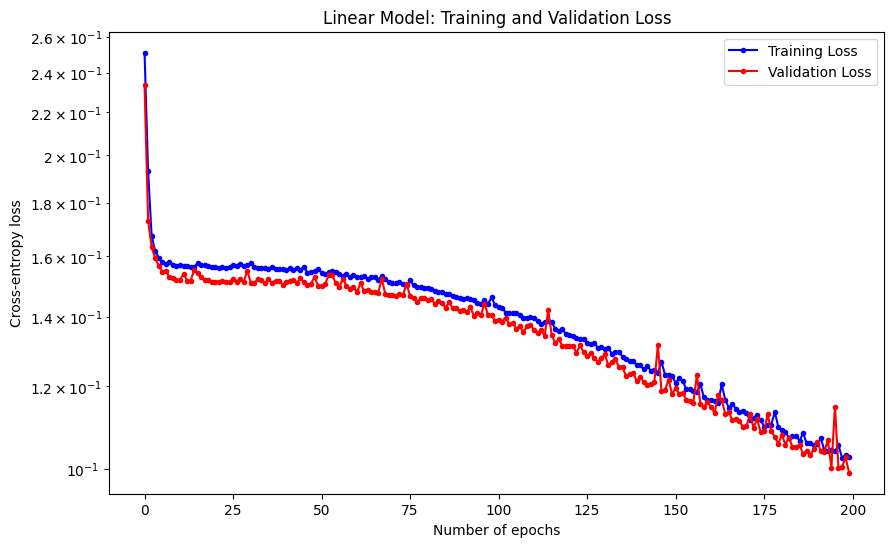

In [ ]:
# Plot cross-entropy for linear data
plt.figure(figsize=(10, 6))
plt.title('Linear Model: Training and Validation Loss')
plt.plot(history_nonlinear.history['loss'], 'b.-', label='Training Loss')
plt.plot(history_nonlinear.history['val_loss'], 'r.-', label='Validation Loss')
plt.ylabel('Cross-entropy loss')
plt.xlabel('Number of epochs')
plt.yscale('log')
plt.legend()

# Get current model losses
plt.show()

In [ ]:
# Compute cross-entropy loss for the test set
test_loss_nn2 = best_NN_nonlinear.evaluate(test_set_x, test_set_y2, verbose=1)


print(f"Test Loss for neural network non linear: {test_loss_nn2}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1064 - recall: 0.2627
Test Loss for neural network non linear: [0.10276301205158234, 0.2732447683811188]


### 3c) ROC curves and AUC scores

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


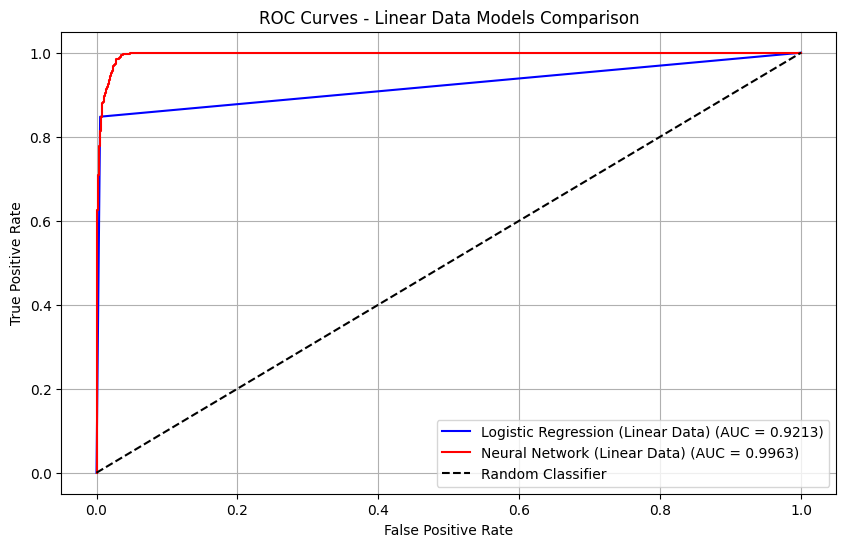

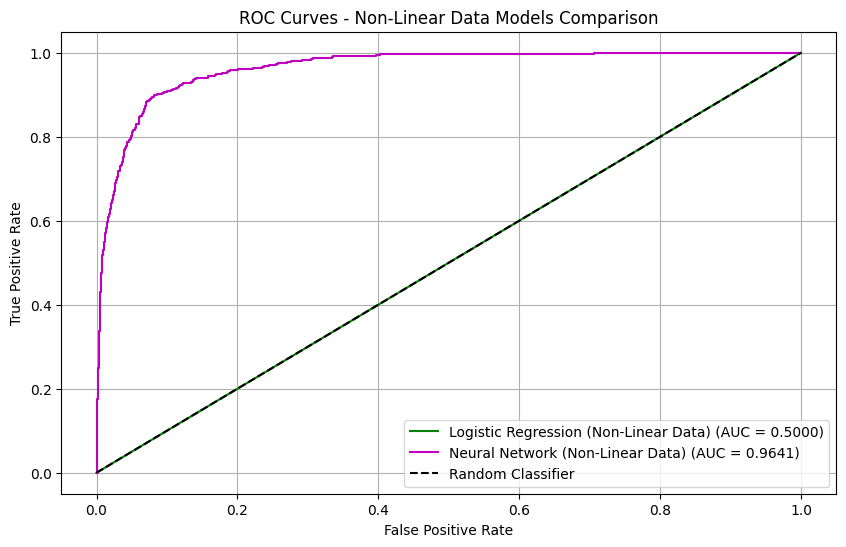

Linear Data Comparison:
Logistic Regression AUC: 0.9213
Neural Network AUC: 0.9963

Non-Linear Data Comparison:
Logistic Regression AUC: 0.5000
Neural Network AUC: 0.9641


In [ ]:
# Plot the ROC curves and compute the AUC scores
# You can use roc_auc_score and roc_curve from sklearn.metrics
# Plot the ROC curves and compute the AUC scores


# Get predictions for all models
# Linear data models
logistic_linear_test_pred = predicted_y1
neural_linear_test_pred = neural_network_linear.predict(test_set_x)

# Non-linear data models
logistic_nonlinear_test_pred = predicted_y2
neural_nonlinear_test_pred = best_NN_nonlinear.predict(test_set_x)

# Compute ROC curves and AUC scores
# Linear data comparison
fpr_logistic_linear, tpr_logistic_linear, _ = roc_curve(test_set_y1, logistic_linear_test_pred)
auc_logistic_linear = roc_auc_score(test_set_y1, logistic_linear_test_pred)

fpr_neural_linear, tpr_neural_linear, _ = roc_curve(test_set_y1, neural_linear_test_pred)
auc_neural_linear = roc_auc_score(test_set_y1, neural_linear_test_pred)

# Non-linear data comparison
fpr_logistic_nonlinear, tpr_logistic_nonlinear, _ = roc_curve(test_set_y2, logistic_nonlinear_test_pred)
auc_logistic_nonlinear = roc_auc_score(test_set_y2, logistic_nonlinear_test_pred)

fpr_neural_nonlinear, tpr_neural_nonlinear, _ = roc_curve(test_set_y2, neural_nonlinear_test_pred)
auc_neural_nonlinear = roc_auc_score(test_set_y2, neural_nonlinear_test_pred)

# Plot ROC curves for linear data comparison
plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic_linear, tpr_logistic_linear, 'b-', label=f'Logistic Regression (Linear Data) (AUC = {auc_logistic_linear:.4f})')
plt.plot(fpr_neural_linear, tpr_neural_linear, 'r-', label=f'Neural Network (Linear Data) (AUC = {auc_neural_linear:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Linear Data Models Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for non-linear data comparison
plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic_nonlinear, tpr_logistic_nonlinear, 'g-', label=f'Logistic Regression (Non-Linear Data) (AUC = {auc_logistic_nonlinear:.4f})')
plt.plot(fpr_neural_nonlinear, tpr_neural_nonlinear, 'm-', label=f'Neural Network (Non-Linear Data) (AUC = {auc_neural_nonlinear:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Non-Linear Data Models Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print AUC scores
print("Linear Data Comparison:")
print(f"Logistic Regression AUC: {auc_logistic_linear:.4f}")
print(f"Neural Network AUC: {auc_neural_linear:.4f}")
print("\nNon-Linear Data Comparison:")
print(f"Logistic Regression AUC: {auc_logistic_nonlinear:.4f}")
print(f"Neural Network AUC: {auc_neural_nonlinear:.4f}")

# Exercise 4. Comparison of lending strategies

In [ ]:
lr2_pred_test = logistic_regression_nonlinear.predict_proba(test_set_x)[:,1]
nn2_pred_test = best_NN_nonlinear.predict(test_set_x).flatten()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
False


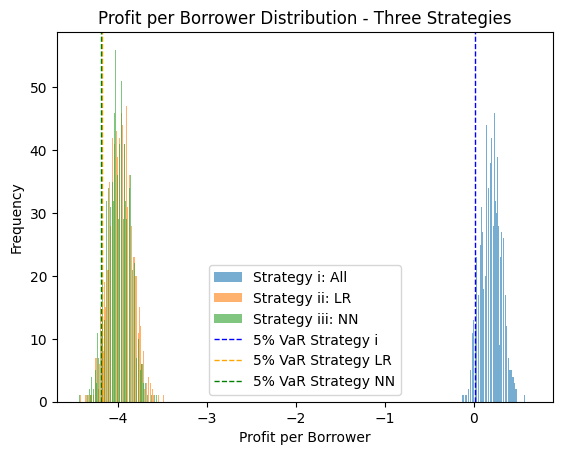

Mean Profit Strategy i: 0.19775990000000002
Mean Profit Strategy LR: -3.9678885377765014
Mean Profit Strategy NN: -3.9875762940937967
5% VaR Strategy i: 0.01347250000000003
5% VaR Strategy LR: -4.179115196782534
5% VaR Strategy NN: -4.187869982430058


In [70]:
np.random.seed(random_seed)
# 4. Lending Strategy Simulation
interest_all, interest_sel = 0.055, 0.01

# Simulate 1000 market scenarios
D = np.random.binomial(1, prob_y2[m:, np.newaxis], size=(n, 1000))

print(D)

# Simulate 1000 market scenarios
# 1. Data Generation
m, n = 20000, 10000

def generate_features(size):
    age = np.random.uniform(18, 80, size)
    income = np.random.uniform(1, 15, size)
    employment = np.random.choice([0, 1], size, p=[0.9, 0.1])
    return np.column_stack((age, income, employment))

X = generate_features(m + n)

# Define logistic function
sigmoid = lambda z: 1 / (1 + np.exp(-z))

p2 = sigmoid(-5 + 10*((X[:,0]<25) | (X[:,0]>75)) - 1.1*X[:,1] + X[:,2])
D_ = np.random.binomial(1, p2[m:, np.newaxis], size=(n, 1000))

print(np.all(D == D_))

# Strategies (per borrower)
def strategy_per_borrower(d_matrix, selected_indices, interest):
    loan_amount = 100
    repayments = loan_amount * (1 + interest)
    profit_matrix = np.where(d_matrix == 0, repayments, 0) - loan_amount
    return profit_matrix[selected_indices].mean(axis=0)

# Strategy (i): All borrowers
profit_i = strategy_per_borrower(D, np.arange(n), interest_all)
profit_i_mean = profit_i.mean(axis=0)

# Strategy (ii): Logistic Regression (threshold=0.05)
selected_lr = np.where(lr2_pred_test <= 0.05)[0]
profit_lr = strategy_per_borrower(D, selected_lr, interest_sel)
profit_lr_mean = profit_lr.mean(axis=0)


# Strategy (iii): Neural Network (threshold=0.05)
selected_nn = np.where(nn2_pred_test <= 0.05)[0]
profit_nn = strategy_per_borrower(D, selected_nn, interest_sel)
profit_nn_mean = profit_nn.mean(axis=0)

# 5. Results and Visualization
# Plot histograms of the three strategies
plt.hist(profit_i, bins=100, alpha=0.6, label='Strategy i: All')
plt.hist(profit_lr, bins=100, alpha=0.6, label='Strategy ii: LR')
plt.hist(profit_nn, bins=100, alpha=0.6, label='Strategy iii: NN')
plt.xlabel('Profit per Borrower')
plt.axvline(np.percentile(profit_i, 5), color='blue', linestyle='dashed', linewidth=1, label='5% VaR Strategy i')
plt.axvline(np.percentile(profit_lr, 5), color='orange', linestyle='dashed', linewidth=1, label='5% VaR Strategy LR')
plt.axvline(np.percentile(profit_nn, 5), color='green', linestyle='dashed', linewidth=1, label='5% VaR Strategy NN')
plt.ylabel('Frequency')
plt.legend()
plt.title('Profit per Borrower Distribution - Three Strategies')
plt.show()
#print the mean profit for each strategy
print('Mean Profit Strategy i:', profit_i_mean)
print('Mean Profit Strategy LR:', profit_lr_mean)
print('Mean Profit Strategy NN:', profit_nn_mean)
# Calculate VaR per borrower for the three strategies
print('5% VaR Strategy i:', np.percentile(profit_i, 5))
print('5% VaR Strategy LR:', np.percentile(profit_lr, 5))
print('5% VaR Strategy NN:', np.percentile(profit_nn, 5))